In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

In [56]:
x = np.random.uniform(-20, 20, 10000)
y = 7 * x ** 3 - 12 * x ** 2 - 22 * x + 7

In [57]:
print(x)

[  7.9930841   10.44199249  -0.48347273 ...  -1.80277867 -13.45111343
  -6.08881945]


In [58]:
x = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

In [59]:
size = len(x)
x_train, y_train = x[:int(size * 0.90)], y[:int(size * 0.90)]
x_test, y_test = x[int(size * 0.90):int(size * 0.95)], y[int(size * 0.90):int(size * 0.95)]
x_val, y_val = x[int(size * 0.95):], y[int(size * 0.95):]

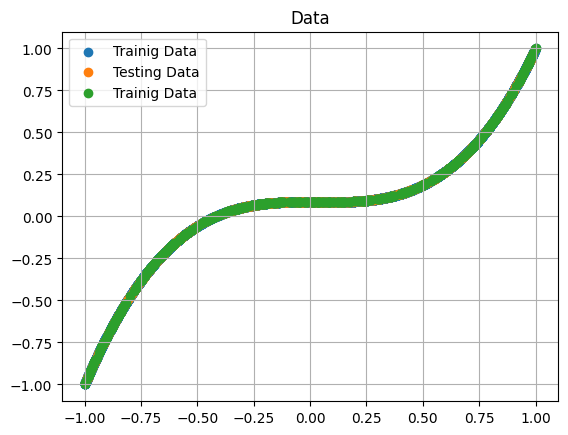

In [60]:
plt.scatter(x_train, y_train, label="Trainig Data")
plt.scatter(x_test, y_test, label="Testing Data")
plt.scatter(x_val, y_val, label="Trainig Data")
plt.grid()
plt.title("Data")
plt.legend()
plt.show()

In [61]:
# Building the model
inputs = Input((1,), name='input_layer')
x = Dense(32, activation = "relu", name='hidden_layer_1')(inputs)
x = Dense(64, activation = "relu", name='hidden_layer_2')(x)
x = Dense(128, activation = "relu", name='hidden_layer_3')(x)
outputs = Dense(1, name = "output_Layer")(x)

model = Model(inputs, outputs, name = "Deep_Neural_Network")
model.summary()

Model: "Deep_Neural_Network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_Layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = [tf.keras.metrics.R2Score(name = "accuracy")])

In [63]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8531 - loss: 0.0189 - val_accuracy: 0.9983 - val_loss: 2.8167e-04
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.9985 - loss: 2.0814e-04 - val_accuracy: 0.9997 - val_loss: 4.5260e-05
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.9998 - loss: 3.3964e-05 - val_accuracy: 0.9999 - val_loss: 1.4676e-05
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.9999 - loss: 1.1270e-05 - val_accuracy: 0.9999 - val_loss: 2.1482e-05
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.9999 - loss: 8.2334e-06 - val_accuracy: 1.0000 - val_loss: 4.6285e-06
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 1.0000 - loss: 4.9678e-06 - val_accuracy: 1.0000 - val_loss: 3.3564e-06
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 1.0000 - loss: 5.3448e-06 - val_accuracy: 1.0000 - val_loss: 4.4195e-06
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━

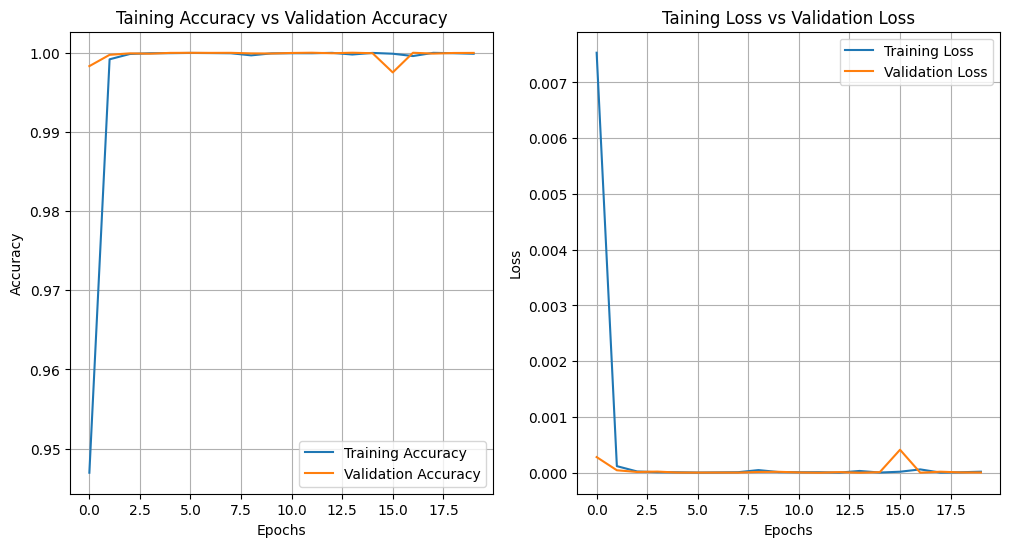

In [66]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Taining Accuracy vs Validation Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Taining Loss vs Validation Loss")
plt.legend(["Training Loss", "Validation Loss"])
plt.grid()

plt.show()

In [67]:
loss, acc = model.evaluate(x_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 1.0000 - loss: 5.3477e-06


In [68]:
print(f"Loss: {loss * 100:.4f}%")
print(f"Accuracy: {acc * 100:.4f}%")

Loss: 0.0005%
Accuracy: 99.9962%


In [69]:
y_pred = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


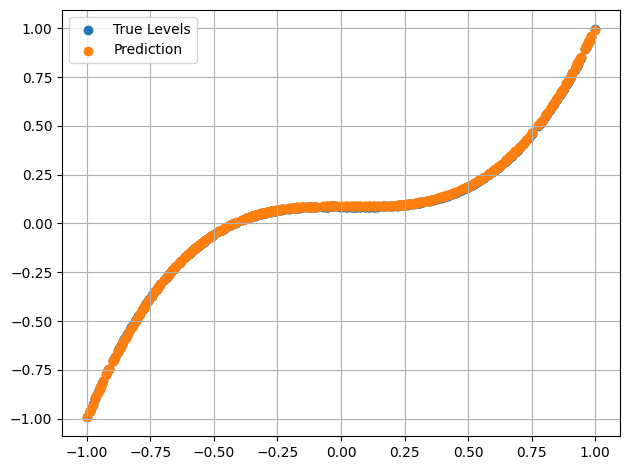

In [72]:
plt.scatter(x_test,y_test)
plt.scatter(x_test, y_pred)
plt.legend(["True Levels", "Prediction"])
plt.tight_layout()
plt.grid()
plt.show()